### 信用卡欺诈检测

- 数据描述及来源：[信用卡欺诈检测数据集](https://www.kesci.com/home/dataset/5b56a592fc7e9000103c0442)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### 通过观察数据描述及真实数据样本：

1. 可以将Time属性去掉。

2. V1—V28进行了脱敏，但特征数目比较多，需要进行降维。

3. Amount特征需要进行标准化数据预处理。

4. 信用卡是否存在欺诈，是一个明显的二分类问题，根据逻辑回归算法的特色，可以通过统计Class特征对正反类别进行判断。

Text(0,0.5,'Frequency')

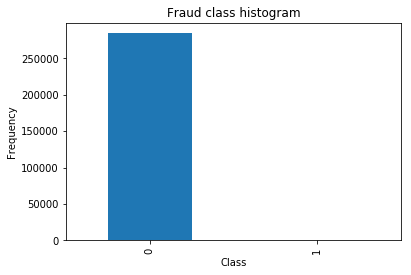

In [3]:
# 绘制条形图判断01类别
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

- 因为实际情况下信用卡数据正常一定多于异常，所以由上图可知，Class特征为0属于正常用户数据。

In [4]:
# 对Amount特征进行标准化处理
from sklearn.preprocessing import StandardScaler

# 将标准化后的数据生成新列normAmount
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))  # reshape(-1, 1)将参数处理为二维
# 删除Time和Amount
data = data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [5]:
# 下采样策略使01一样少
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']

# 1的数量
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

# 挑出0的数据
normal_indices = data[data.Class == 0].index

# 在0中随机选择1的数量个
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# 将选好的01数据合并
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])

# 下采样之后的数据
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.loc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.loc[:, under_sample_data.columns == 'Class']

# 显示比率
print("正常交易的百分比: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("异常交易的百分比: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("下采样后的数据总数: ", len(under_sample_data))

正常交易的百分比:  0.5
异常交易的百分比:  0.5
下采样后的数据总数:  984


In [6]:
# 分割训练集和测试集
from sklearn.model_selection import train_test_split

# 所有数据
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)  # random_state = 0随机切割

# 下采样数据
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.25
                                                                                                   ,random_state = 0)

In [25]:
# 用召回率进行模型评估 Recall = TP/(TP+FN)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report 

In [34]:
# 交叉验证
def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(len(y_train_data),5,shuffle=False)  # 五倍交叉验证

    # 正则化惩罚项参数
    c_param_range = [0.01,0.1,1,10,100]

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    j = 0
    for c_param in c_param_range:
        print('惩罚力度项: ', c_param)

        recall_accs = []
        for iteration, indices in enumerate(fold,start=1):

            # L1正则 逻辑回归
            lr = LogisticRegression(C = c_param, penalty = 'l1')

            # 训练集训练数据
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # 预测数据
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)

            # 计算不同参数的召回率
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print('迭代次数 ', iteration,': 召回率：', recall_acc)

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.loc[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('平均召回率 ', np.mean(recall_accs))
        print('')

    best_c = results_table.loc[results_table['Mean recall score'].values.argmax()]['C_parameter']
    
    print('最好的正则惩罚项参数为：', best_c)

    
    return best_c

In [35]:
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample)

惩罚力度项:  0.01
迭代次数  1 : 召回率： 0.9625
迭代次数  2 : 召回率： 0.9012345679012346
迭代次数  3 : 召回率： 0.9523809523809523
迭代次数  4 : 召回率： 0.9743589743589743
迭代次数  5 : 召回率： 0.971830985915493

平均召回率  0.9524610961113309

惩罚力度项:  0.1
迭代次数  1 : 召回率： 0.8875
迭代次数  2 : 召回率： 0.8271604938271605
迭代次数  3 : 召回率： 0.8888888888888888
迭代次数  4 : 召回率： 0.9487179487179487
迭代次数  5 : 召回率： 0.9154929577464789

平均召回率  0.8935520578360954

惩罚力度项:  1
迭代次数  1 : 召回率： 0.9
迭代次数  2 : 召回率： 0.8518518518518519
迭代次数  3 : 召回率： 0.9365079365079365
迭代次数  4 : 召回率： 0.9615384615384616
迭代次数  5 : 召回率： 0.9154929577464789

平均召回率  0.9130782415289458

惩罚力度项:  10
迭代次数  1 : 召回率： 0.9375
迭代次数  2 : 召回率： 0.8518518518518519
迭代次数  3 : 召回率： 0.9523809523809523
迭代次数  4 : 召回率： 0.9615384615384616
迭代次数  5 : 召回率： 0.9154929577464789

平均召回率  0.9237528447035489

惩罚力度项:  100
迭代次数  1 : 召回率： 0.9375
迭代次数  2 : 召回率： 0.8518518518518519
迭代次数  3 : 召回率： 0.9682539682539683
迭代次数  4 : 召回率： 0.9615384615384616
迭代次数  5 : 召回率： 0.9154929577464789

平均召回率  0.9269274478781521

最好的正则惩罚项参数为： 0.0

In [36]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    绘制混淆矩阵
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

下采样测试集召回率:  0.9411764705882353


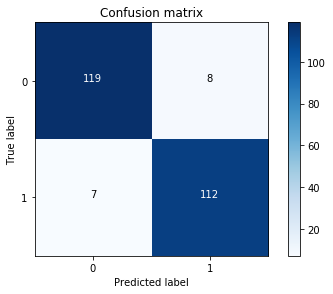

In [37]:
import itertools
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

print("下采样测试集召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

全测试集召回率:  0.925


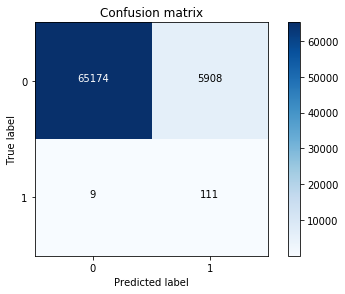

In [38]:
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("全测试集召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

- 不进行下采样，对原始数据直接进行处理，精度对比。

In [39]:
best_c = printing_Kfold_scores(X_train,y_train)

惩罚力度项:  0.01
迭代次数  1 : 召回率： 0.46835443037974683
迭代次数  2 : 召回率： 0.5866666666666667
迭代次数  3 : 召回率： 0.6349206349206349
迭代次数  4 : 召回率： 0.589041095890411
迭代次数  5 : 召回率： 0.4634146341463415

平均召回率  0.5484794924007602

惩罚力度项:  0.1
迭代次数  1 : 召回率： 0.5189873417721519
迭代次数  2 : 召回率： 0.64
迭代次数  3 : 召回率： 0.6666666666666666
迭代次数  4 : 召回率： 0.6438356164383562
迭代次数  5 : 召回率： 0.524390243902439

平均召回率  0.5987759737559227

惩罚力度项:  1
迭代次数  1 : 召回率： 0.5189873417721519
迭代次数  2 : 召回率： 0.6266666666666667
迭代次数  3 : 召回率： 0.6984126984126984
迭代次数  4 : 召回率： 0.6712328767123288
迭代次数  5 : 召回率： 0.5609756097560976

平均召回率  0.6152550386639887

惩罚力度项:  10
迭代次数  1 : 召回率： 0.5189873417721519
迭代次数  2 : 召回率： 0.6133333333333333
迭代次数  3 : 召回率： 0.6984126984126984
迭代次数  4 : 召回率： 0.6712328767123288
迭代次数  5 : 召回率： 0.5609756097560976

平均召回率  0.612588371997322

惩罚力度项:  100
迭代次数  1 : 召回率： 0.5189873417721519
迭代次数  2 : 召回率： 0.6133333333333333
迭代次数  3 : 召回率： 0.6984126984126984
迭代次数  4 : 召回率： 0.6712328767123288
迭代次数  5 : 召回率： 0.5609756097560

全数据的召回率:  0.6583333333333333


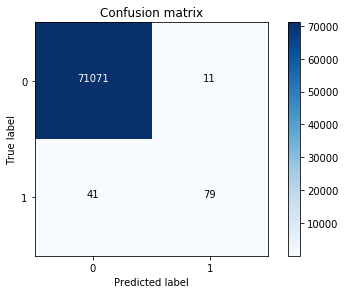

In [40]:
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train,y_train.values.ravel())
y_pred_undersample = lr.predict(X_test.values)

# 计算混淆矩阵
cnf_matrix = confusion_matrix(y_test,y_pred_undersample)
np.set_printoptions(precision=2)

print("全数据的召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

召回率:  1.0
召回率:  1.0
召回率:  1.0
召回率:  0.9915966386554622
召回率:  0.9411764705882353
召回率:  0.8823529411764706
召回率:  0.8571428571428571
召回率:  0.7478991596638656
召回率:  0.5882352941176471


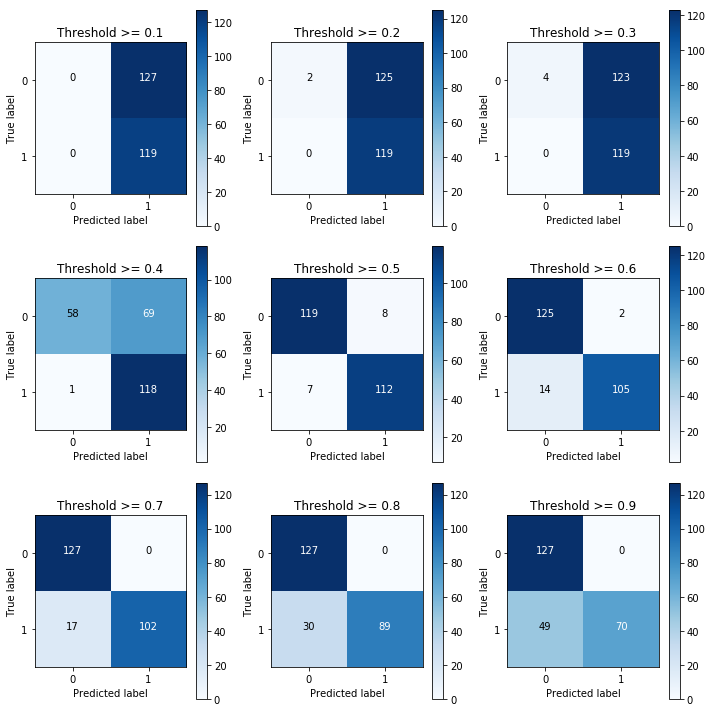

In [41]:
lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    # 计算混淆矩阵
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    # 画图
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 

- 说明sigmoid的阈值也不是越高越好。

- 下面采用上采样进行数据处理。

In [46]:
import pandas as pd
from imblearn.over_sampling import SMOTE
# from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [47]:
credit_cards=pd.read_csv('creditcard.csv')

columns=credit_cards.columns
# 删除最后一列
features_columns=columns.delete(len(columns)-1)

features=credit_cards[features_columns]
labels=credit_cards['Class']

In [48]:
features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.25, 
                                                                            random_state=0)

In [49]:
# SMOTE上采样 基于欧式距离
oversampler=SMOTE(random_state=0)
os_features,os_labels=oversampler.fit_sample(features_train,labels_train)

In [50]:
len(os_labels[os_labels==1])

213233

In [51]:
os_features = pd.DataFrame(os_features)
os_labels = pd.DataFrame(os_labels)
best_c = printing_Kfold_scores(os_features,os_labels)

惩罚力度项:  0.01
迭代次数  1 : 召回率： 0.9090909090909091
迭代次数  2 : 召回率： 0.8897058823529411
迭代次数  3 : 召回率： 0.9705833746488184
迭代次数  4 : 召回率： 0.962071916804427
迭代次数  5 : 召回率： 0.9629864115460823

平均召回率  0.9388876988886355

惩罚力度项:  0.1
迭代次数  1 : 召回率： 0.9090909090909091
迭代次数  2 : 召回率： 0.8897058823529411
迭代次数  3 : 召回率： 0.9718346436244304
迭代次数  4 : 召回率： 0.9647216066969153
迭代次数  5 : 召回率： 0.9649091953618703

平均召回率  0.9400524474254134

惩罚力度项:  1
迭代次数  1 : 召回率： 0.9090909090909091
迭代次数  2 : 召回率： 0.8897058823529411
迭代次数  3 : 召回率： 0.9717165993814482
迭代次数  4 : 召回率： 0.9635257289578277
迭代次数  5 : 召回率： 0.9650850597352655

平均召回率  0.9398248359036783

惩罚力度项:  10
迭代次数  1 : 召回率： 0.9090909090909091
迭代次数  2 : 召回率： 0.8897058823529411
迭代次数  3 : 召回率： 0.9718582524730269
迭代次数  4 : 召回率： 0.9647216066969153
迭代次数  5 : 召回率： 0.965026438277467

平均召回率  0.9400806177782519

惩罚力度项:  100
迭代次数  1 : 召回率： 0.9090909090909091
迭代次数  2 : 召回率： 0.8897058823529411
迭代次数  3 : 召回率： 0.971811034775834
迭代次数  4 : 召回率： 0.9639478034539763
迭代次数  5 : 召回率： 0.

召回率:  0.8916666666666667


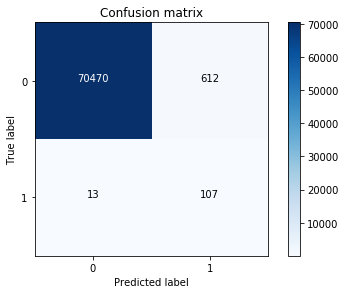

In [52]:
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(os_features,os_labels.values.ravel())
y_pred = lr.predict(features_test.values)

cnf_matrix = confusion_matrix(labels_test,y_pred)
np.set_printoptions(precision=2)

print("召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()